In [56]:
from google.colab import drive

In [57]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import os

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/Predictive maintenance/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the merged dataframe
data.head()


,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm Location Info,Cleared On,Site Name,Clearance Status,First Occurred On,Site ID,Ticket ID,Vendor,Domain,Device Type
0,2024-06-17 13:35:19,Dewalapola-GM0065-23G2596-HY,Major,DROPRATIO_OVER,source=Dewalapola-GM0065-23G2596-HY location=3...,2024-06-17 13:35:35,Devalapola,Cleared,2024-06-17 11:00:01,GM0065,NaN,HUAWEI,Transmission,Microwave
1,2024-06-17 13:32:50,tstpd0pil1,Minor,IP Connection Restricted,[Location=IP7CONN htmsc4a3],2024-06-17 13:33:22,NaN,Cleared,2024-06-17 13:27:36,NaN,NaN,16,Others,NaN
2,2024-06-17 13:32:31,tstpd0pil1,Critical,Exceeded Service Error Threshold Lvl 2,[Location=SCCP SYSTEM],2024-06-17 13:34:30,NaN,Cleared,2024-06-17 12:58:32,NaN,NaN,16,Others,NaN
3,2024-06-17 13:30:49,PILI-AMF-01,Major,S1ap Link Down,"Service Instance=LINK_VNFC_999, Mobile Country...",2024-06-17 13:31:21,Piliyandala,Cleared,2024-06-17 13:30:49,CM0091,NaN,HUAWEI,Core,UNC
4,2024-06-17 13:30:48,Kuda_Heenatiyangala-KL0317-SCU,Warning,Sub-device configuration out of sync,"SDN=0,PowerManager=ERS,PowerSystem=M530B",2024-06-17 13:32:23,Kuda_Heenatiyangala,Cleared,2024-06-17 13:30:48,KL0317,NaN,ERICSSON,Others,NaN


# Data Cleaning and Preprocessing


*  Drops unnecessary columns (e.g., 'Alarm','Severity', 'Ticket ID').

*  Filters the DataFrame to keep only rows where 'Domain' is 'Access'.

*   Handles missing values (NaN) by dropping rows containing them.

*   Converts date columns ('Last Occurred On', 'First Occurred On') to datetime objects.






In [60]:
# Columns to drop
columns_to_drop = ['Alarm Severity', 'Alarm Location Info', 'Clearance Status', 'Ticket ID','Cleared On']

# Dropping unnecessary columns
data.drop(columns=columns_to_drop, inplace=True)

# Filter rows where Domain is 'Access'
access_data = data[data['Domain'] == 'Access']

# Display the first few rows to verify the changes
access_data.head()


,Last Occurred On,Alarm Source,Alarm Name,Site Name,First Occurred On,Site ID,Vendor,Domain,Device Type
5,2024-06-17 13:30:47,Gangulandeniya-RA0174-BHP,FUSE FAILURE ALARM,Gangulandeniya,2024-06-17 13:30:47,RA0174,ERICSSON,Access,eNodeB
9,2024-06-17 13:30:45,MC2_Hingula_Reloc1-KE0228-HOP,Rectifier Failure Alarm,Hingula_Reloc,2024-06-17 13:30:45,KE0228,ERICSSON,Access,eNodeB
13,2024-06-17 13:30:44,Rekawa-HA0056-Z,No Calibration from SynchE,Rekawa,2024-06-17 13:30:44,HA0056,ERICSSON,Access,Switch
29,2024-06-17 13:30:40,Padalangala1-RA0022-BHOP,Service Unavailable,Padalangala,2024-06-17 13:30:40,RA0022,ERICSSON,Access,eNodeB
34,2024-06-17 13:30:32,Dodangoda_Town-KL0106-Z,Ethernet Interface Down,Dodangoda_Town,2024-06-17 13:30:32,KL0106,ERICSSON,Access,Switch


In [61]:
# Assuming 'df' is your DataFrame
df.dropna(inplace=True)

In [62]:
# Convert date columns to datetime
access_data['Last Occurred On'] = pd.to_datetime(access_data['Last Occurred On'])
access_data['First Occurred On'] = pd.to_datetime(access_data['First Occurred On'])



# Display the first few rows to verify the new features
access_data.head()


<ipython-input-62-178b1022c9c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_data['Last Occurred On'] = pd.to_datetime(access_data['Last Occurred On'])
<ipython-input-62-178b1022c9c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_data['First Occurred On'] = pd.to_datetime(access_data['First Occurred On'])


,Last Occurred On,Alarm Source,Alarm Name,Site Name,First Occurred On,Site ID,Vendor,Domain,Device Type
5,2024-06-17 13:30:47,Gangulandeniya-RA0174-BHP,FUSE FAILURE ALARM,Gangulandeniya,2024-06-17 13:30:47,RA0174,ERICSSON,Access,eNodeB
9,2024-06-17 13:30:45,MC2_Hingula_Reloc1-KE0228-HOP,Rectifier Failure Alarm,Hingula_Reloc,2024-06-17 13:30:45,KE0228,ERICSSON,Access,eNodeB
13,2024-06-17 13:30:44,Rekawa-HA0056-Z,No Calibration from SynchE,Rekawa,2024-06-17 13:30:44,HA0056,ERICSSON,Access,Switch
29,2024-06-17 13:30:40,Padalangala1-RA0022-BHOP,Service Unavailable,Padalangala,2024-06-17 13:30:40,RA0022,ERICSSON,Access,eNodeB
34,2024-06-17 13:30:32,Dodangoda_Town-KL0106-Z,Ethernet Interface Down,Dodangoda_Town,2024-06-17 13:30:32,KL0106,ERICSSON,Access,Switch


# Encoding Categorical Variables

*   Uses LabelEncoder to convert categorical columns (e.g., 'Alarm Source', 'Site Name') into numerical representations.



In [63]:
# Example: Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Alarm Source'] = label_encoder.fit_transform(data['Alarm Source'])
data['Alarm Name'] = label_encoder.fit_transform(data['Alarm Name'])
data['Site Name'] = label_encoder.fit_transform(data['Site Name'])

# Encode 'Site ID'
data['Site ID'] = label_encoder.fit_transform(data['Site ID'])

# Encode 'Vendor'
data['Vendor'] = label_encoder.fit_transform(data['Vendor'])

# Encode 'Domain'
data['Domain'] = label_encoder.fit_transform(data['Domain'])

# Encode 'Device Type'
data['Device Type'] = label_encoder.fit_transform(data['Device Type'])

# Display the updated dataframe to verify the changes
print(data.head())


      Last Occurred On  Alarm Source  Alarm Name  Site Name  \
0  2024-06-17 13:35:19          7941         456        963   
1  2024-06-17 13:32:50         27433         836       5090   
2  2024-06-17 13:32:31         27433         550       5090   
3  2024-06-17 13:30:49         20822        1439       3812   
4  2024-06-17 13:30:48         14379        1533       2431   

     First Occurred On  Site ID  Vendor  Domain  Device Type  
0  2024-06-17 11:00:01     1891       5       8           13  
1  2024-06-17 13:27:36     4965       1       6           37  
2  2024-06-17 12:58:32     4965       1       6           37  
3  2024-06-17 13:30:49      695       5       2           26  
4  2024-06-17 13:30:48     3295       2       6           37  


# Exploratory Data Analysis (EDA)

*  Explores unique values and their counts for categorical columns like 'Alarm Name'.





In [64]:
# Columns of DataFrame
print(access_data.columns)


Index(['Last Occurred On', 'Alarm Source', 'Alarm Name', 'Site Name',
       'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type'],
      dtype='object')


In [65]:
# Explore unique values and value counts for categorical columns like 'Alarm Name', 'Alarm Source', etc.
print("\nUnique values in 'Alarm Name' column:")
print(access_data['Alarm Name'].unique())


Unique values in 'Alarm Name' column:
['FUSE FAILURE ALARM' 'Rectifier Failure Alarm'
 'No Calibration from SynchE' 'Service Unavailable'
 'Ethernet Interface Down' 'Mains Failure Alarm' 'E1/T1 Loss Of Frame'
 'E1/T1 Loss of Signal' 'ALC Controlling Threshold Crossing' 'OML FAULT'
 'E1/T1 Remote Defect Indication' 'PLMN Service Redundancy Lost'
 'Cell Out of Service'
 'RADIO X-CEIVER ADMINISTRATION MANAGED OBJECTS IN TRANSCEIVER GROUP MANUALLY BLOCKED'
 'Cell Quality Degraded' 'Cell Unavailable'
 'NE and OSS alarms are not in sync' 'Service Degraded' 'Temperature High'
 'RF Unit DC Input Power Failure' 'GSM Local Cell Unusable'
 'RF Unit Power Surge Protector Fault' 'RF Unit Maintenance Link Failure'
 'RF Unit External Power Supply Insufficient' 'User Plane Fault'
 'TimeSyncIO Reference Failed' 'Link Degraded' 'ABIS PATH OVERLOAD'
 'Generator On Load Alarm' 'Node Group Sync Loss of All SoCC'
 'Cell Capability Degraded' 'Resource Allocation Failure'
 'BBU CPRI Interface Error' 'THEFT A

In [66]:

# Let's filter out non-numeric columns before calculating correlations

# List of numeric columns (assuming these are the columns you want to include)
numeric_columns = ['Last Occurred On']

numeric_data = access_data[numeric_columns]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                  Last Occurred On
Last Occurred On               1.0


# Visualizing Alarm Patterns


*   Selects the top 5 locations with the most alarms.
*   For each top location, plots the latest 20 alarms over time using a line plot.





<ipython-input-70-65f8f8207633>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
<ipython-input-70-65f8f8207633>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)


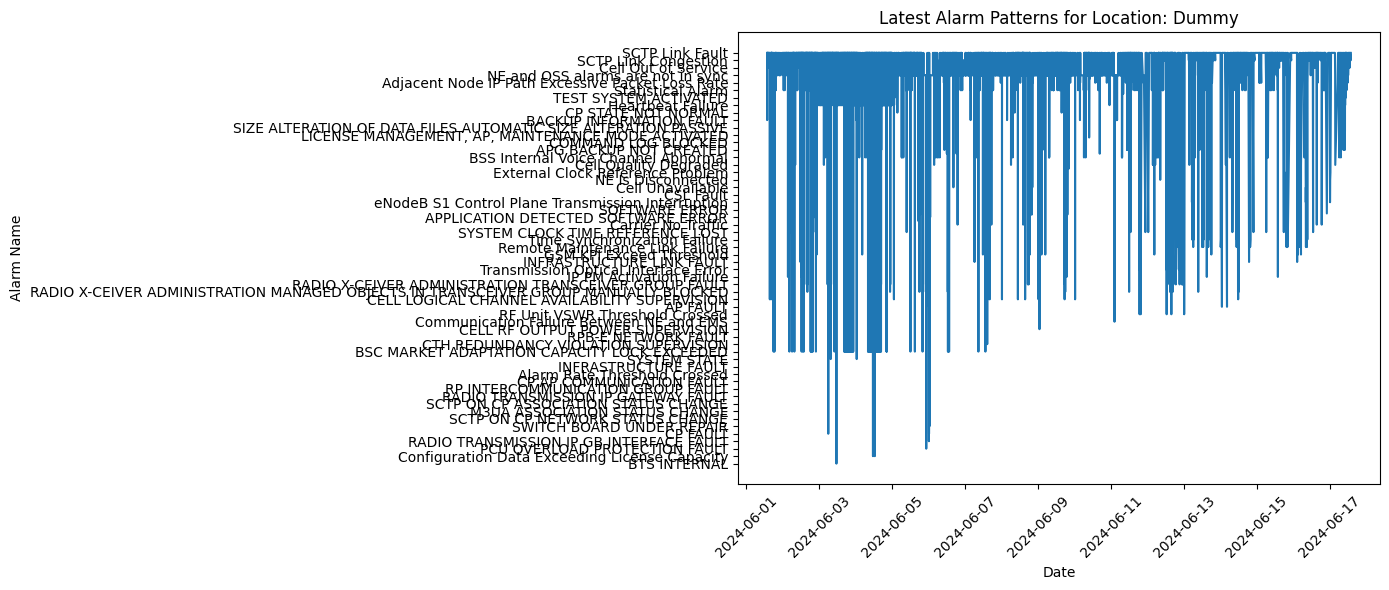

<ipython-input-70-65f8f8207633>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
<ipython-input-70-65f8f8207633>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)


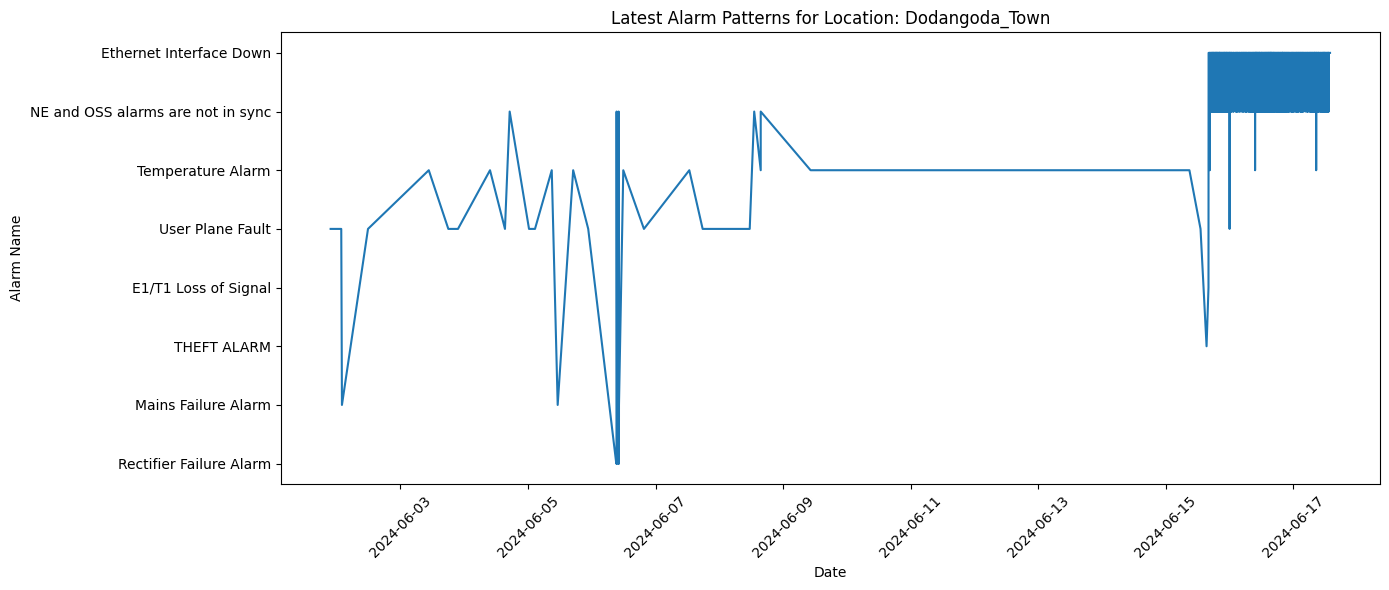

<ipython-input-70-65f8f8207633>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
<ipython-input-70-65f8f8207633>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)


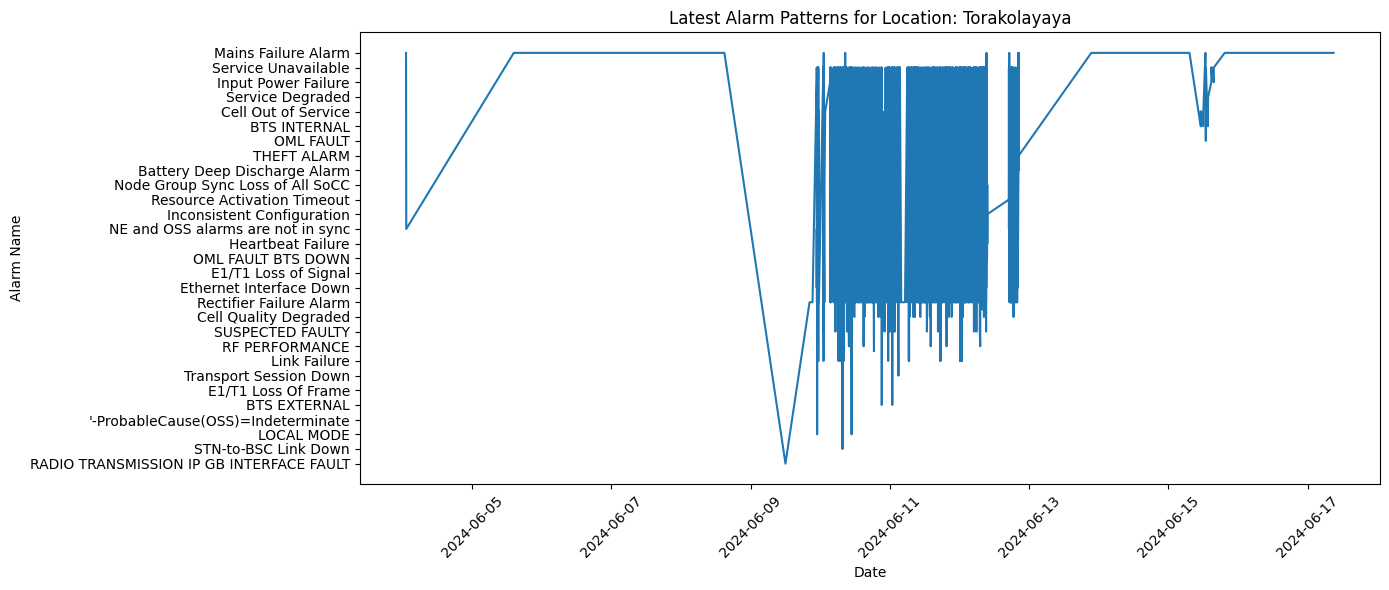

<ipython-input-70-65f8f8207633>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
<ipython-input-70-65f8f8207633>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)


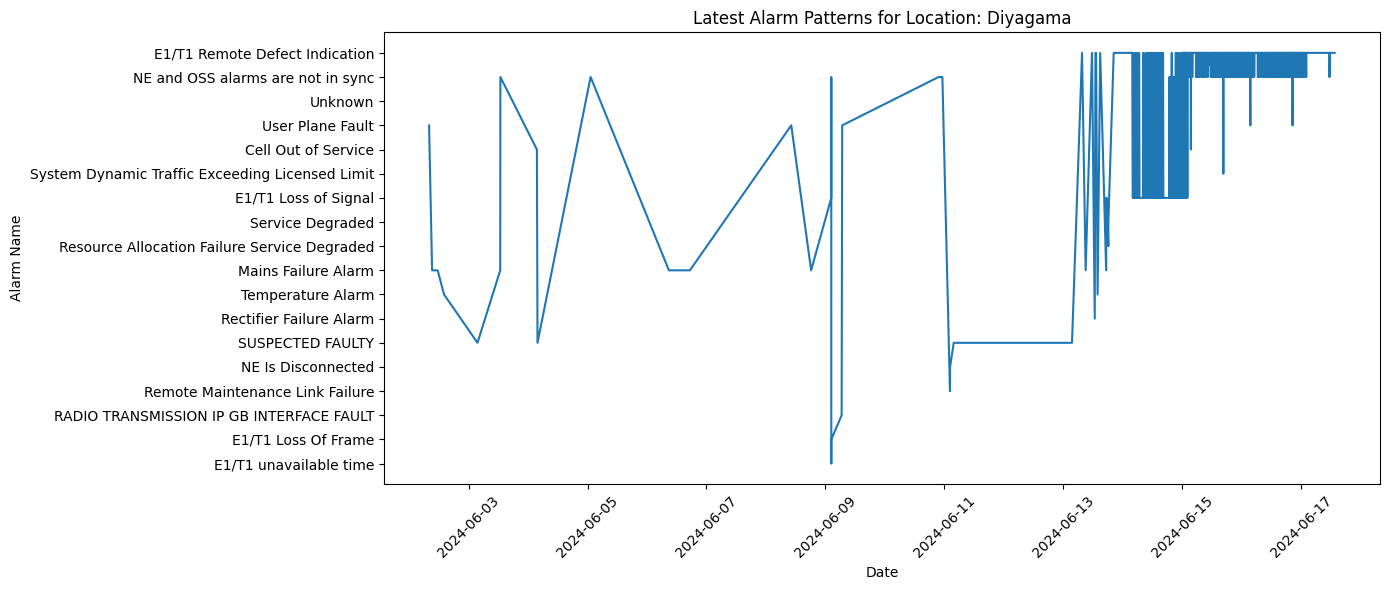

<ipython-input-70-65f8f8207633>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
<ipython-input-70-65f8f8207633>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)


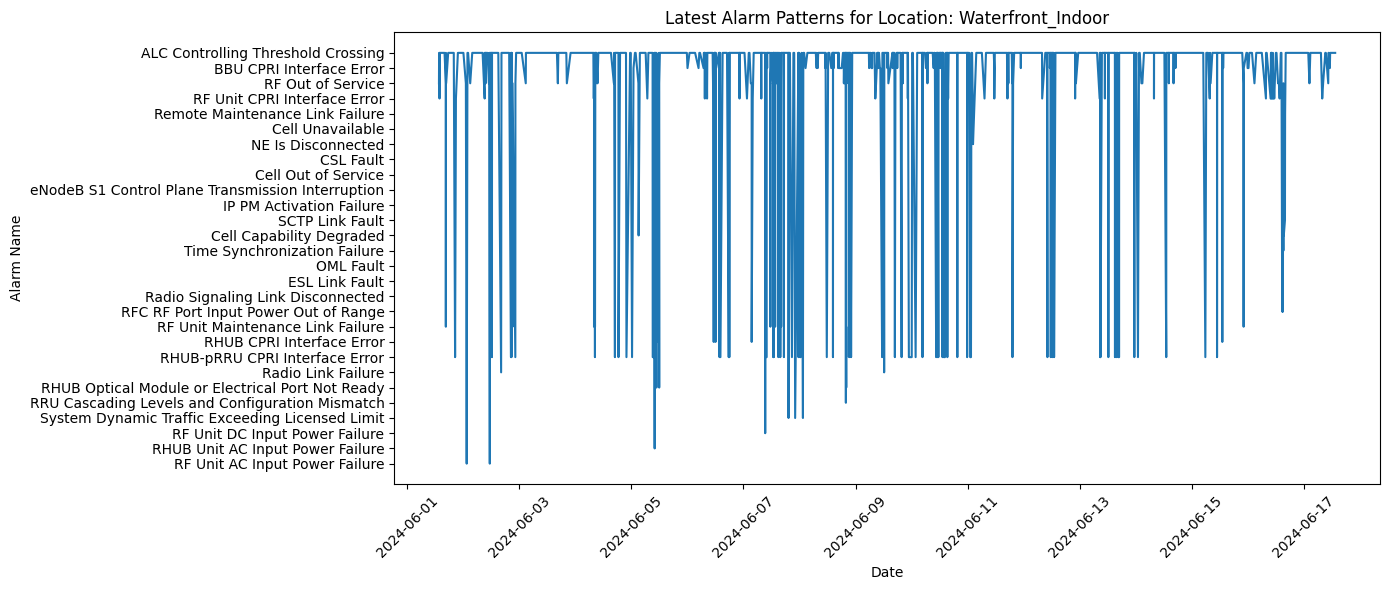

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 5 locations based on the latest alarms
top_locations = access_data['Site Name'].value_counts().index[:5]

# Loop through each top location and plot latest alarms over time
for location in top_locations:
    plt.figure(figsize=(14, 6))
    data_location = access_data[access_data['Site Name'] == location]

    # Sort by 'Last Occurred On' to get the latest alarms
    data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
    latest_data_location = data_location.head(500000)  # Limit to the latest 20 alarms for better visualization

    # Plotting time series of latest alarms for the current location
    sns.lineplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location, ci=None)

    # Adding titles and labels
    plt.title(f'Latest Alarm Patterns for Location: {location}')
    plt.xlabel('Date')
    plt.ylabel('Alarm Name')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Displaying the plot
    plt.tight_layout()
    plt.show()

# Identify Patterns

*  Selects Latest Locations: Identifies the 5 sites with the most recent alarm occurrences based on 'Last Occurred On' date.
*  Limits the data to the latest 50 alarms for visualization.

*  Each dot represents a specific alarm occurrence at a given time.
The plots visualize the latest alarm patterns for each site, helping to identify recent trends and patterns in alarm occurrences over time.



<ipython-input-71-a4a88e7ba8ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)


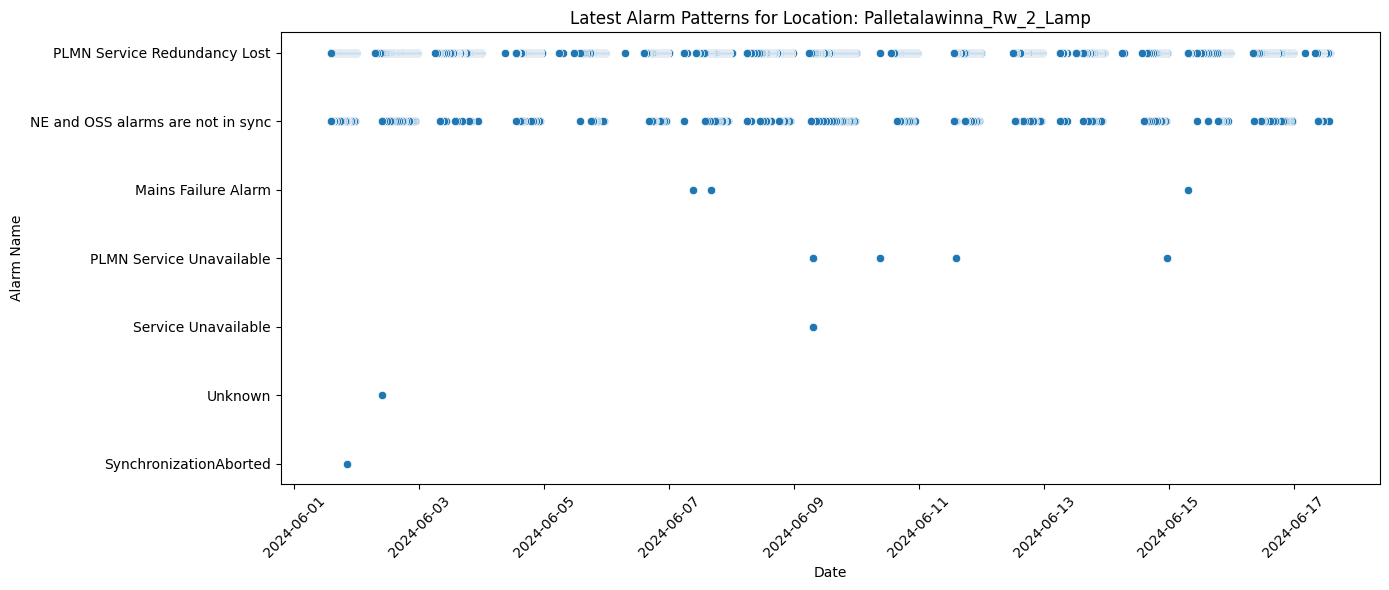

<ipython-input-71-a4a88e7ba8ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)


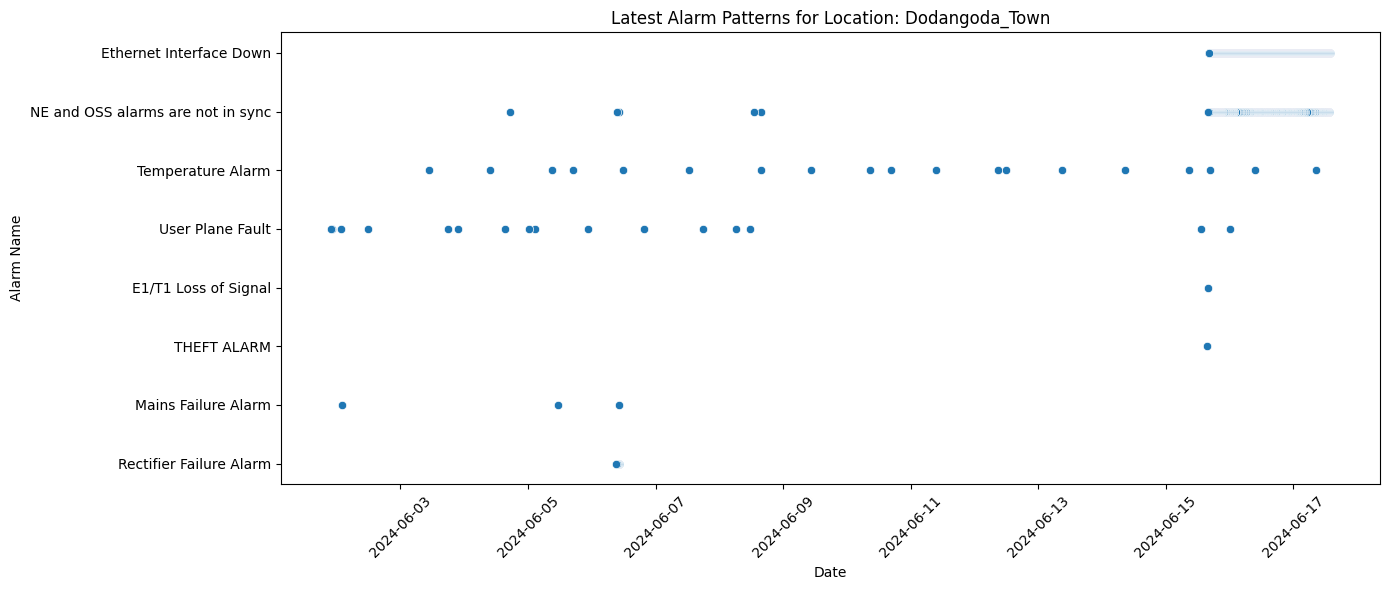

<ipython-input-71-a4a88e7ba8ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)


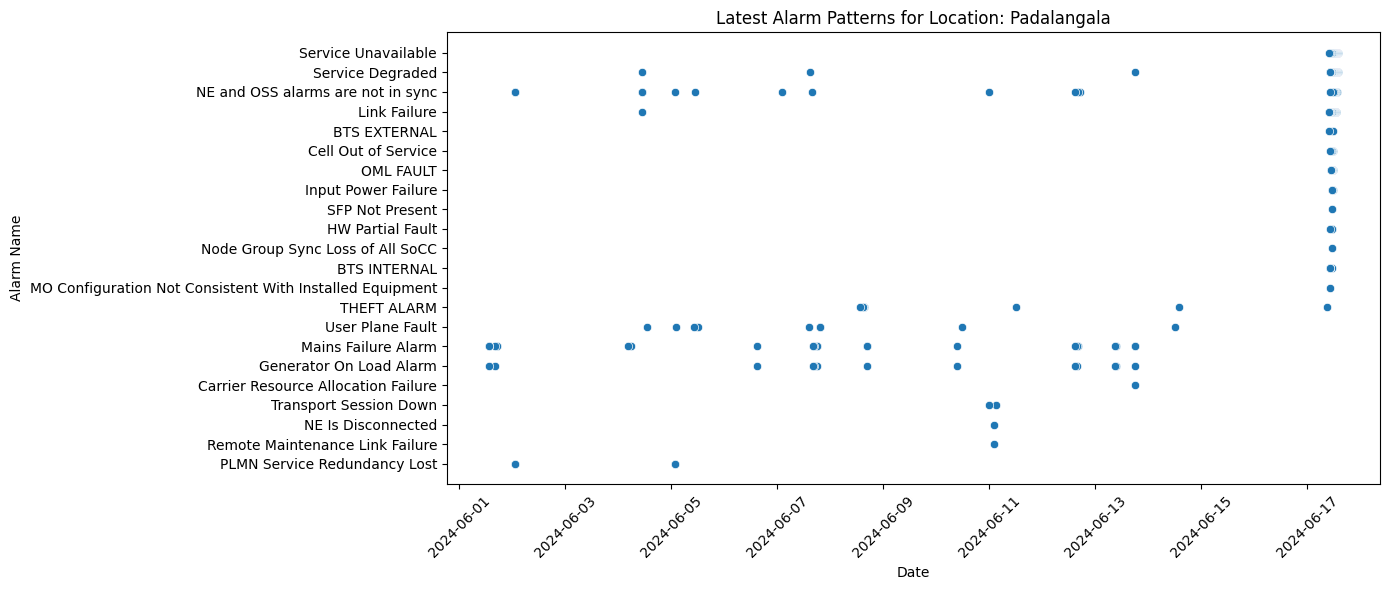

<ipython-input-71-a4a88e7ba8ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)


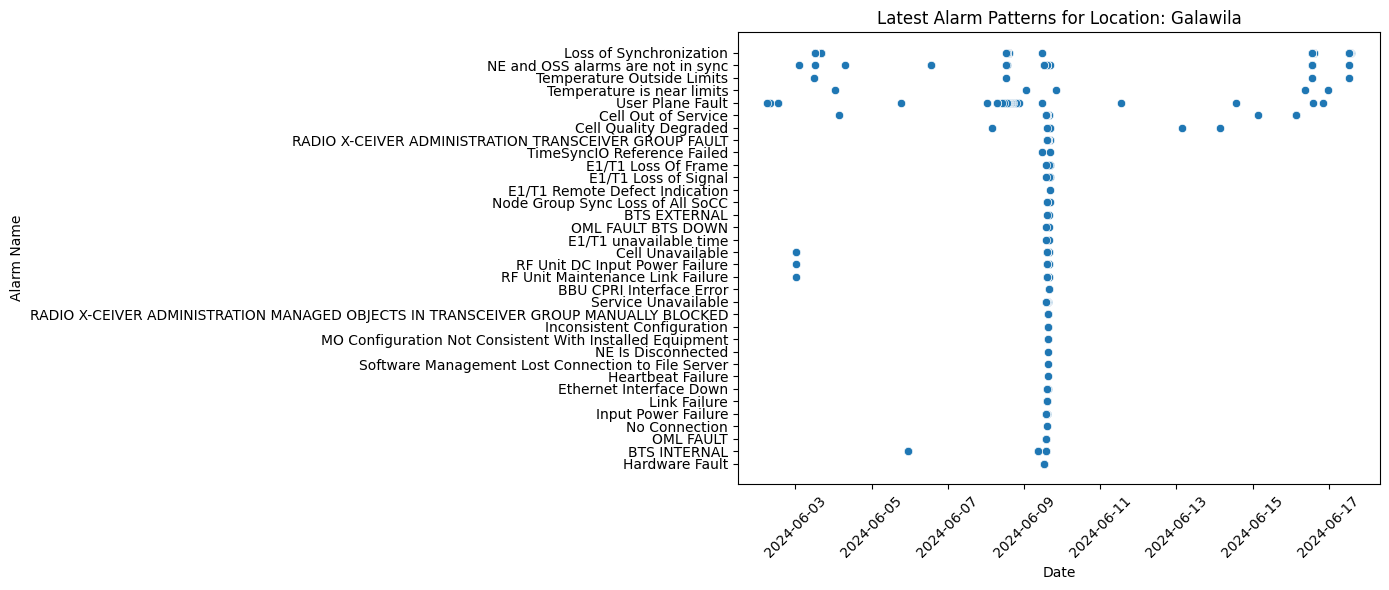

<ipython-input-71-a4a88e7ba8ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)


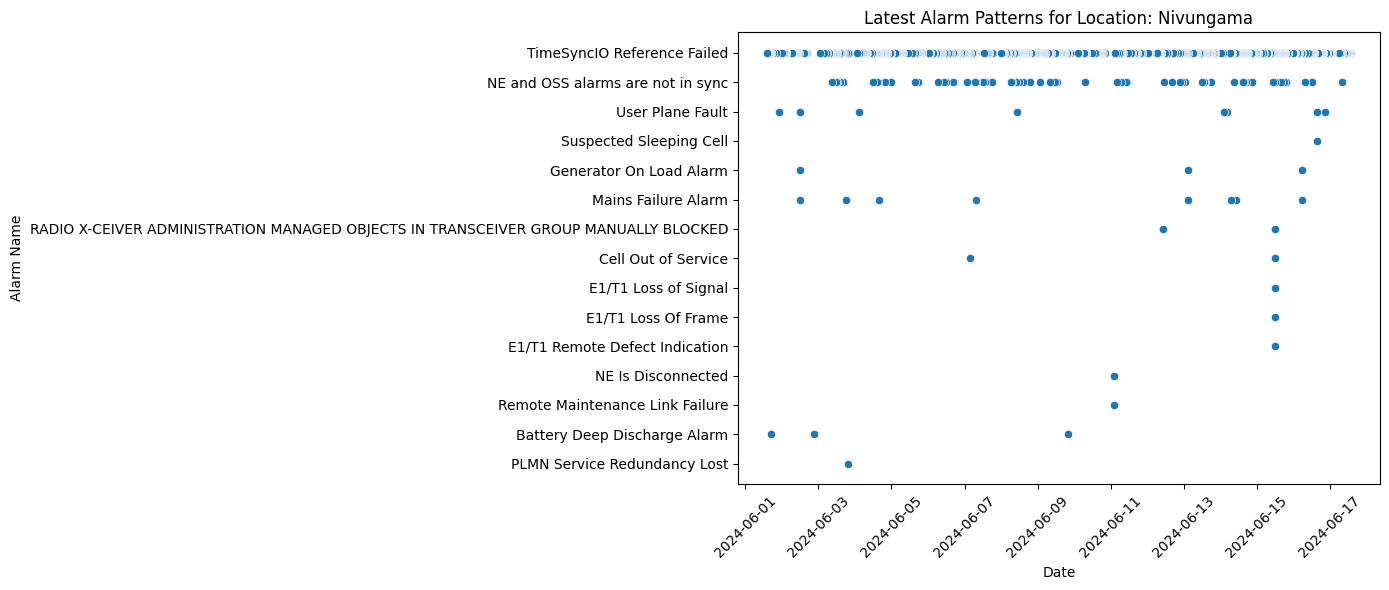

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the latest 5 locations based on the most recent 'Last Occurred On' date
latest_locations = access_data.groupby('Site Name')['Last Occurred On'].max().sort_values(ascending=False).index[:5]

# Loop through each latest location and plot the alarms over time
for location in latest_locations:
    plt.figure(figsize=(14, 6))
    data_location = access_data[access_data['Site Name'] == location]

    # Sort by 'Last Occurred On' to get the latest alarms
    data_location.sort_values(by='Last Occurred On', ascending=False, inplace=True)
    latest_data_location = data_location.head(50000)  # Limit to the latest 100 alarms for better visualization

    # Plotting dot plot of latest alarms for the current location
    sns.scatterplot(x='Last Occurred On', y='Alarm Name', data=latest_data_location)

    # Adding titles and labels
    plt.title(f'Latest Alarm Patterns for Location: {location}')
    plt.xlabel('Date')
    plt.ylabel('Alarm Name')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
